<a href="https://colab.research.google.com/github/CodesByVishal/Movie-Reccomendation-System-ML-Project/blob/main/Movie_Reccomendation_System_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
# Loading Dataset
movie = pd.read_csv('/content/drive/MyDrive/Movie reccomendation ML Project/dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Movie reccomendation ML Project/dataset/tmdb_5000_credits.csv')

In [194]:
# Overview of Movie data
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [195]:
# Overview of crew data
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [196]:
#merging both data
movies = movie.merge(credits, on='title')

In [197]:
#Calling any 5 random rows fron the merged dataset
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
2616,16000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.amightyheartmovie.com/,1988,"[{""id"": 321, ""name"": ""terror""}, {""id"": 917, ""n...",en,A Mighty Heart,Based on Mariane Pearl's account of the terrif...,9.717392,"[{""name"": ""Plan B Entertainment"", ""id"": 81}, {...",...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,One woman dared to keep hope alive,A Mighty Heart,6.7,95,1988,"[{""cast_id"": 17, ""character"": ""Mariane Pearl"",...","[{""credit_id"": ""52fe4329c3a36847f803ee29"", ""de..."
3951,3000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,11229,"[{""id"": 378, ""name"": ""prison""}, {""id"": 5034, ""...",en,Freeway,"Following the arrest of her mother, Ramona, yo...",4.682881,"[{""name"": ""The Kushner-Locke Company"", ""id"": 2...",...,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Her life is no fairy tale.,Freeway,6.5,95,11229,"[{""cast_id"": 1, ""character"": ""Bob Wolverton"", ...","[{""credit_id"": ""52fe44169251416c750285b5"", ""de..."
2476,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,9594,"[{""id"": 2143, ""name"": ""loss of parents""}, {""id...",en,Double Impact,Jean Claude Van Damme plays a dual role as Ale...,10.484642,"[{""name"": ""Stone Group Pictures"", ""id"": 3470}]",...,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two brothers separated by the violence. Now to...,Double Impact,5.3,215,9594,"[{""cast_id"": 1, ""character"": ""Alex / Chad Wagn...","[{""credit_id"": ""52fe450ec3a36847f80b9d6f"", ""de..."
4072,2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://miamericamovie.net/,364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,Mi America,A hate-crime has been committed in a the small...,0.039007,"[{""name"": ""Industrial House Films"", ""id"": 65589}]",...,126.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,NaN,Mi America,0.0,0,364083,"[{""cast_id"": 6, ""character"": ""Roe Ramirez"", ""c...","[{""credit_id"": ""576ec0019251416cae008521"", ""de..."
3574,5000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,227348,"[{""id"": 6152, ""name"": ""supernatural""}, {""id"": ...",en,Paranormal Activity: The Marked Ones,Seventeen-year-old Jesse has been hearing terr...,19.984477,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...",...,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You're one of us now.,Paranormal Activity: The Marked Ones,5.2,449,227348,"[{""cast_id"": 21, ""character"": ""Jesse Arista"", ...","[{""credit_id"": ""5345887c0e0a267bcd001f50"", ""de..."


In [198]:
movies.shape

(4809, 23)

# Starting EDA of the dataset


In [199]:
#checking null values
null = pd.DataFrame(movies.isnull().sum()).reset_index()
null = null.rename(columns={'index':'column', 0:'null_count'})
null['percentage'] = round((null['null_count']/len(movies))*100,2)
null

,column,null_count,percentage
0,budget,0,0.00
1,genres,0,0.00
2,homepage,3096,64.38
3,id,0,0.00
4,keywords,0,0.00
5,original_language,0,0.00
6,original_title,0,0.00
7,overview,3,0.06
8,popularity,0,0.00
9,production_companies,0,0.00


In [200]:
movies['homepage'].sample(10)

879                                    NaN
2111                                   NaN
3196                                   NaN
1796                                   NaN
4461                                   NaN
1610         http://www.30daysofnight.com/
2152    http://www.welcometothefamily.com/
710                                    NaN
1916                                   NaN
1081            http://www.theantbully.com
Name: homepage, dtype: object

In [201]:
movies.drop('homepage', axis = 1, inplace = True )


In [202]:
movies.drop('tagline', axis = 1, inplace = True)

In [203]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [204]:
# Dropping null value coulmns
movies.dropna(inplace=True)

In [205]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [206]:
# Checking duplicate values
movies.duplicated().sum()

0

In [207]:
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [208]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.805000e+03,4805.000000,4805.000000,4.805000e+03,4805.000000,4805.000000,4805.000000,4805.000000
mean,2.904866e+07,56855.301561,21.509226,8.234360e+07,106.909469,6.094527,690.902185,56855.301561
std,4.071484e+07,88195.446460,31.810774,1.628883e+08,22.551937,1.187720,1234.542302,88195.446460
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,8.000000e+05,9009.000000,4.682881,0.000000e+00,94.000000,5.600000,54.000000,9009.000000
50%,1.500000e+07,14608.000000,12.929525,1.918402e+07,104.000000,6.200000,236.000000,14608.000000
75%,4.000000e+07,58431.000000,28.350927,9.292120e+07,118.000000,6.800000,738.000000,58431.000000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,447027.000000


In [209]:
# to convert string of list to list of list
import ast
#since we have to use ast.literal_eval for converting string of list to list of list

In [210]:
#Creating a function to get the name of genres
def convert(obj):
  l = []
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l

In [211]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [212]:
#Applying the convert function on genre column
movies['genres'] = movies['genres'].apply(convert)

In [213]:
movies['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [214]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [215]:
#Applying the convert function on keywords column
movies['keywords'] = movies['keywords'].apply(convert)

In [216]:
movies['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [217]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [218]:
#Creating a function to get the top 5  name of cast
def convert_top_5(obj):
  l = []
  count = 0
  for i in ast.literal_eval(obj):
    if count !=5:
      l.append(i['name'])
      count = count+1
    else:
      break

  return l


In [219]:
#Applying the convert_top_5 function on cast column
movies['cast'] = movies['cast'].apply(convert_top_5)

In [220]:
movies['cast'][0]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [221]:
#Creating a function to get the Director name from crew
def director(obj):
  l = []
  for i in ast.literal_eval(obj):
    if i['job'] =='Director':
      l.append(i['name'])
      break
  return l

In [222]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [223]:
#Applying the director function on crew column to get the director name
movies['crew'] = movies['crew'].apply(director)

In [224]:
movies['crew'][0]

['James Cameron']

In [229]:
movies['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [230]:
#Applying the convert function on production_companies column
movies['production_companies'] = movies['production_companies'].apply(convert)

In [231]:
movies['production_companies'][0]

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

In [233]:
movies['production_countries'][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [234]:
#Applying the convert function on production_companies column
movies['production_countries'] = movies['production_countries'].apply(convert)

In [235]:
movies['production_countries'][0]

['United States of America', 'United Kingdom']

In [236]:
movies['spoken_languages'][0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [237]:
#Applying the convert function on production_companies column
movies['spoken_languages'] = movies['spoken_languages'].apply(convert)

In [241]:
movies['spoken_languages'][0]

['English', 'Español']

In [246]:
movies.sample(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew,index
2282,19400000,"[Drama, Romance]",14202,"[china, cholera, foreign aid, epidemic, lovele...",en,The Painted Veil,A British medical doctor fights a cholera outb...,20.746932,"[Emotion Pictures, The Mark Gordon Company, Cl...","[Canada, China, United States of America]",...,125.0,"[Français, 普通话, English]",Released,The Painted Veil,7.1,312,14202,"[Edward Norton, Juliet Howland, Naomi Watts, I...",[John Curran],4695
2397,14000000,[Thriller],75638,"[paranormal, psychic, skepticism]",en,Red Lights,"Two investigators of paranormal hoaxes, the ve...",22.748174,"[First Generation Films, Antena 3 Films, Telev...","[Spain, United States of America]",...,119.0,[English],Released,Red Lights,6.0,376,75638,"[Sigourney Weaver, Robert De Niro, Cillian Mur...",[Rodrigo Cortés],4695
425,80000000,"[Adventure, Action, Thriller]",954,"[paris, london england, spy, cia, terrorist, s...",en,Mission: Impossible,"When Ethan Hunt, the leader of a crack espiona...",75.290998,"[Paramount Pictures, Cruise/Wagner Productions]",[United States of America],...,110.0,"[English, Français, Český]",Released,Mission: Impossible,6.7,2631,954,"[Tom Cruise, Jon Voight, Emmanuelle Béart, Hen...",[Brian De Palma],4695
3965,3000000,"[Thriller, Horror]",234212,"[detective, haunted house, investigation, anti...",en,Demonic,A police officer and a psychologist investigat...,12.564554,"[Icon Entertainment International, Dimension F...","[United Kingdom, United States of America]",...,83.0,[English],Released,Demonic,4.9,148,234212,"[Maria Bello, Frank Grillo, Cody Horn, Dustin ...",[Will Canon],4695
391,85000000,"[Comedy, Family, Fantasy, Romance]",4523,"[poison, queen, fairy tale, musical, princess,...",en,Enchanted,The beautiful princess Giselle is banished by ...,29.219980,"[Walt Disney Pictures, Josephson Entertainment...",[United States of America],...,107.0,[English],Released,Enchanted,6.6,1449,4523,"[Amy Adams, Patrick Dempsey, James Marsden, Ti...",[Kevin Lima],4695
3917,0,"[Romance, Thriller, Western]",223485,"[fire, bounty hunter, shotgun, horseback ridin...",en,Slow West,"In the Old West, a 17-year-old Scottish boy te...",14.936661,"[The New Zealand Film Commission, Film4, See S...","[New Zealand, United Kingdom]",...,84.0,"[English, Türkçe]",Released,Slow West,6.6,367,223485,"[Michael Fassbender, Kodi Smit-McPhee, Ben Men...",[John Maclean],4695
2617,15000000,"[Drama, Comedy, Romance]",16222,[],en,Whatever It Takes,"A nerdy teen, Ryan Woodman is smitten with the...",8.074807,[Columbia Pictures Corporation],[United States of America],...,94.0,[English],Released,Whatever It Takes,5.0,37,16222,"[Jodi Lyn O'Keefe, Shane West, Marla Sokoloff,...",[David Raynr],4695
2797,3100000,"[Romance, Science Fiction]",59457,[],en,Womb,A woman's consuming love forces her to bear th...,7.453347,[Razor Film Produktion GmbH],"[Germany, France, Hungary]",...,111.0,[English],Released,Womb,5.9,92,59457,"[Eva Green, Matt Smith, Lesley Manville, Peter...",[Benedek Fliegauf],4695
1548,30000000,"[Action, Adventure, Crime]",1637,"[bomb, airport, bus, bus ride, highway, bomb p...",en,Speed,Los Angeles SWAT cop Jack Traven is up against...,49.526736,[Twentieth Century Fox Film Corporation],[United States of America],...,116.0,[English],Released,Speed,6.8,1783,1637,"[Keanu Reeves, Dennis Hopper, Sandra Bullock, ...",[Jan de Bont],4695
1730,28000000,"[Drama, Romance]",4348,"[bachelor, beautiful, prejudice, suitor, perio...",en,Pride & Prejudice,Pride & Prejudice is a humorous story of love ...,36.583830,"[Universal Pictures, StudioCanal, Scion Films,...","[France, United Kingdom, United States of Amer...",...,135.0,[English],Released,Pride & Prejudice,7.7,1358,4348,"[Keira Knightley, Matthew Macfadyen, Rosamund ...",[Joe Wright],4695


In [255]:
movies.iloc[4695:4696]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
4699,0,"[Thriller, Drama, Science Fiction]",289180,[woman director],en,H.,H. is a modern interpretation of a classic Gre...,1.045623,[],"[United States of America, Argentina]",...,0,93.0,[English],Released,H.,6.5,4,289180,"[Robin Bartlett, Rebecca Dayan, Will Janowitz,...",[Rania Attieh]


In [263]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4805 non-null   int64  
 1   genres                4805 non-null   object 
 2   id                    4805 non-null   int64  
 3   keywords              4805 non-null   object 
 4   original_language     4805 non-null   object 
 5   original_title        4805 non-null   object 
 6   overview              4805 non-null   object 
 7   popularity            4805 non-null   float64
 8   production_companies  4805 non-null   object 
 9   production_countries  4805 non-null   object 
 10  release_date          4805 non-null   object 
 11  revenue               4805 non-null   int64  
 12  runtime               4805 non-null   float64
 13  spoken_languages      4805 non-null   object 
 14  status                4805 non-null   object 
 15  title                 4805

## Univariate Analysis

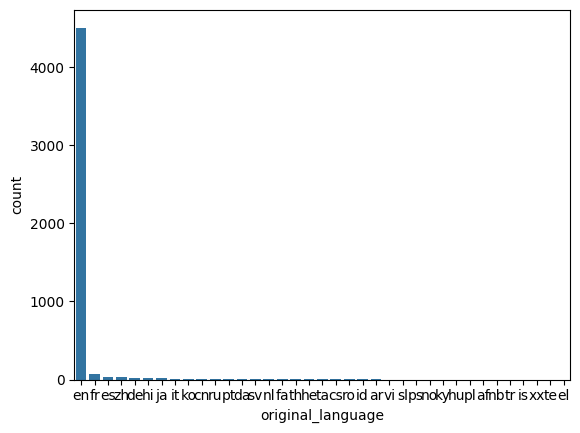

In [284]:
lang = pd.DataFrame(movies['original_language'].value_counts().reset_index())
sns.barplot(data = lang , x ='original_language',y = 'count')
plt.show()

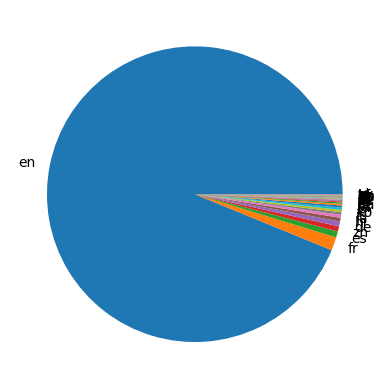

In [288]:
plt.pie(lang['count'], labels = lang['original_language'])
plt.show()

,original_language,count
0,en,4508
1,fr,70
2,es,32
3,zh,27
4,de,26
5,hi,19
6,ja,16
7,it,13
8,ko,12
9,cn,12


# Data Manipulation for ML Part

In [ ]:
# making sub-dataset
movies = movies[['movie_id', 'title',   'overview','genres', 'keywords','cast','crew']]

In [ ]:
movies.head(1)

In [ ]:
# Converting keywords in list for ease of merging it with other column in future
movies['overview']= movies['overview'].apply(lambda x: x.split())


In [ ]:
#Removing space between cast name, crew name, keywords and genres
movies['cast']=movies['cast'].apply(lambda x : [i.replace(' ','') for i in x ])
movies['crew']=movies['crew'].apply(lambda x : [i.replace(' ','') for i in x ])
movies['keywords']=movies['keywords'].apply(lambda x : [i.replace(' ','') for i in x ])
movies['genres']=movies['genres'].apply(lambda x : [i.replace(' ','') for i in x ])

In [ ]:
movies.head(1)

In [ ]:
#merging different columns to get a single column with tags
movies['tags']= movies['overview']+ movies['genres']+ movies['keywords']+movies['cast']+movies['crew']

In [ ]:
movies.head()

In [ ]:
#Creating new data frame with desired columns
new_df = movies[['movie_id', 'title','tags']]
new_df.head()

In [ ]:
#Applying lambda function for converting list into string
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

In [ ]:
new_df.head()

In [ ]:
# Changing tags to lower case for ease in future
new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())

In [ ]:
new_df['tags'][0]

In [ ]:
#Importing NLTK library to use Porter Stemmer for removing similar words like (actions, action or actor, actors)\
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer


In [ ]:
ps = PorterStemmer()

In [ ]:
#creating a function for removing repeating words
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
# applying the stem function
new_df['tags'] = new_df['tags'].apply(stem)

In [ ]:
new_df['tags'][0]

In [ ]:
# Removing stop words from tags
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
# converting each movie to a vector
vectors = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
vectors[0]